<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Bu projede bir saglik kurulusundan alinan gercek veri setiyleyalisacagiz, burda amacimiz, bir makine ögrenmesi
    modeli olusturup, ve bu modelin bize tahminler yapmasini saglamak
</span>

In [1]:
#pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #verilerimizi bölmek icin
from sklearn.linear_model import LinearRegression #linear regression modeli icin
from sklearn.metrics import mean_squared_error #mean squered error icin,tahminlerin dogrulugunu ölcecegiz
import math     #mean squered error da kare alacagim icin bunu import ediyorum

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/TirendazAcademy/MACHINE-LEARNING-TUTORIAL/5a768f2a515639782f87878e54525ebbf328a74b/Datasets/insurance.csv')

In [4]:
data.head()

#bmi vucut kitle indexi

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.to_csv('insurance.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.shape

(1338, 7)

In [8]:
data[216:217] 

#en sonda bu verimizin gercek degeri ile modelimizin tahminini kiyaslayacagiz

,age,sex,bmi,children,smoker,region,charges
216,53,female,26.6,0,no,northwest,10355.641


In [9]:
data.isnull().sum()  #data is clear

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.isnull().sum().sum()

0

In [11]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
data.sex.value_counts()       #categorik yapmaya uygun

male      676
female    662
Name: sex, dtype: int64

In [13]:
data.children.value_counts()         #categorik yapmaya uygun

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [14]:
data.smoker.value_counts()           #categorik yapmaya uygun

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
data.region.value_counts()          #categorik yapmaya uygun

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
data['sex'] = data['sex'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data['region'] = data['region'].astype('category')

In [17]:
smoke_data = data.groupby('smoker').mean().round(2)
smoke_data

#burda sigara icenler daha cok masraf cikarmislar

,age,bmi,children,charges
smoker,,,,
no,39.39,30.65,1.09,8434.27
yes,38.51,30.71,1.11,32050.23


In [18]:
smoke_data = data.groupby('smoker').sum().round(2).charges
smoke_data

smoker
no     8974061.47
yes    8781763.52
Name: charges, dtype: float64

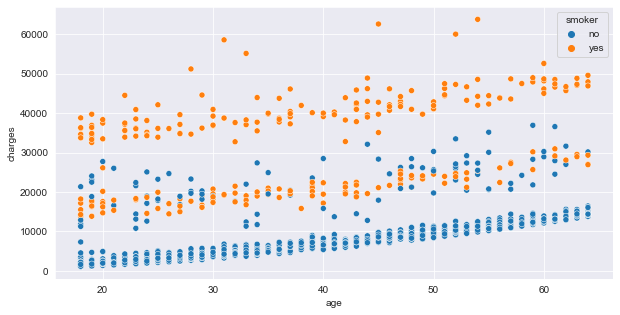

In [19]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")

sns.scatterplot(data=data , x='age' ,y='charges', hue='smoker' );

#burda sigara icenlerin ,icmeyenlere göre daha fazlasaglik harcamalari oldugunu görüyüroz

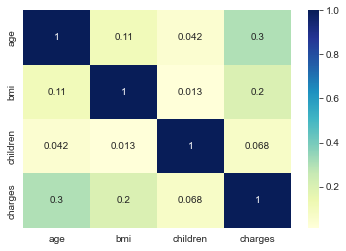

In [20]:
sns.heatmap(data.corr(),cmap="YlGnBu", annot = True);

In [21]:
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [22]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [23]:
data = pd.get_dummies(data)   #veriyi makinanin anlayacagi sekle koyuyourz

In [24]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [25]:
data.charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Bu asamadan sonra ML ye basliyoruz

In [26]:
y = data['charges']    #sonuc yani harcamlarin oldugu column

In [27]:
X = data.drop('charges', axis = 1)  

#harcama, yani sonuc disinda olan ve bizim bagimsiz degisken diyebilecegimiz features lerin hepsi

In [28]:
X
#icinden 'charges' i kaldirdi cünkü bu X ler bagimsiz degiskenler olarak yapiyoruz

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


### modeli kuralim

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 1)
#bu sekilde verileri %80 train ve %20 test verileri olarak bölüyorum

In [30]:
lr = LinearRegression()
#burdan Linear regression modelinden bir örnekleme yapmis olduk
#yukaridada bunun icin Linearregressin import etttik
#aslinda sanki burdan biz bir model olusturduk

In [31]:
lr.fit(X_train, y_train)   #egitim icin aldigim verileri aliyorum,bu adimda modeli egitiyorum
#o simdi X_traindeki(age,sex,smoker,region,chilren) ve y_train(charges) arasinda baglanti kuracak
#ve masraflara hangi kriterlerin ne kadar etkili oldugunu görecek
#simdide egitim verilerini kullanarak modeli kuralim,simdide performansina bakalim diyor


#ilginc ama adam modeli kurduk dedi, yani ne demek istedigini halen anlamiyorum(ama sonradan anladim :)

#burda yaptigi seyi galiba anladim, burda bir üstte bir model kurdu, yani sklearn de hazir olan 
#bir modeli cagirdi aslinda, o arka planda herseyi hazir olan bir model
#biz verileri verdigimizde o kendi algoritmalarina göre veriyi isliyor ve 
#ve biraz sonra X_test verisini veridigimizde yapacagi tahminleri görecegiz ve biz bu tahminlerin basarisini 
#y_test(yani gercek degerlerle) karsilastirip, bulacagiz
#ve asagida 0.762 buldu

LinearRegression()

In [32]:
#yaptigimiz modelin performansini görmek icin, simdide belirleme katsayisini bulalim
#bu deger 1 e nekadar yakinsa model okdar iyidir

## Validation islemleri

In [33]:
lr.score(X_test, y_test).round(3) 

#simdi modelimizin basari oranini görecegiz, bu komut calisinca modelin r_karesi ekrana yaziliyor
#eger modelin r_karesi 0.7 den büyükse model basarili demektir

#aslinda bu bir validation islemidir
#burda sonucu ölcmek icin test veri kümesini kullaniyoruz

0.762

In [34]:
lr.score(X_train, y_train).round(3)

#simdide modelin egitim verileri üzerindeki dogrulugunu görelim
#bu degerde 0.7 den büyük ve test veirlerinin r_karesine yakin cikti
#egitim verilerinide baktik

#ama bunun ne anlama geldigini anlamadim

0.748

## Prediction yapiyor

In [35]:
y_pred = lr.predict(X_test) 

#predict metoduyla input_testleri modele koyuyorum, suan test modellerine göre tahmin yaptk

#simdide modeli degerlendirmek icin bir diger metrik olan hata kareler ortalamasina(mean squared error) bakalim
#bunun icin öncelikle  predict metoduyla test verilerini tahmin edelim

In [36]:
y_pred

#bu benim elindeki verilere bakarak evlerin fiyatlarini tahmin ettigi degerler
#biraz sonra mean squered error ile bu tahminlerin dogrulugunu kontrol edecegim

array([ 4383.68089988, 12885.03892192, 12589.21653212, 13286.22919217,
         544.72832757, 32117.58400779, 12919.04237221, 12318.62183013,
        3784.29145555, 29468.45725408, 11002.8139431 , 17539.69473777,
        8681.35471964,  8349.04325528,  3130.12725504, 10445.83896118,
        3863.74357865,  6944.62510786, 15009.63121084, 14441.59911874,
       12543.65768867, 32958.72553095,  9072.63608136,  8986.85860053,
        3022.85773294,  8164.97136102,  9556.07558002, 10743.20363927,
        7694.01743692,  4373.43771674, 14140.93557984,  5811.78545062,
       34631.91316718, 27009.11191231, 33348.14098668,  9532.96786929,
       30421.65017927, 26648.91186842, 15157.78333287, 33895.76121465,
        6303.38552088, 14059.15156303, 10713.4467824 , 15089.36171493,
        4187.95334069, 13106.4297513 ,  4336.19603407, 28607.05556216,
        7243.57117377, 14269.4643165 , 13282.36924936, 12329.61280721,
        1851.87215658,  8876.2837892 , 26089.18341811, 10125.8221046 ,
      

In [37]:
#simdide mean squred error bulacagimiz icin yukarida kütüphanesini import ettim
#from sklearn.metrics import mean_squared_error
#mean squered error kullanacagim icin, bir kütüphane daha import ediyorum  import math

### simdide ortalama kareler hatasinin(mean squred error) karekökünü alacagim

In [39]:
math.sqrt(mean_squared_error(y_test, y_pred))

#sqrt ile karesini aliyorum, ve az önce import ettigim (mean_squared_error) metirigide icine yaziyorum
#cünkü mean squared karelerini aliyor, bende simdi karekökünü alacagim
#burda icine koydugum degiskenler cok önemli ,dikkat ettim y_test ve y_pred leri koydu
#yani bu ikisi arasindaki dogrulugu bulacak
#ama üstteki lr.score(X_test, y_test).round(3)  ne ise yaradigini tam ANLAYAMADIM aslinda 
#ben hata oranini bulacagim icin. test verilerini ele aliyorum 
#y_test yani bizim gercek degerlerimiz, saglik icin yapilan harcamalarin gercek degeri
#y_pred bizim modelimizin yapmis oldugu tahminler
#ve gercekler ile, onun buldugu arasindaki iliskiye bakacagiz, kaclik bir standart sapma ile 
#tahmin ettigne bakalim

#5956 lik bir standar hata ile tahmin ediyor

#artik bu asamada istedigimiz veriyi modele vererek tahminler yapabilriz
#galiba artik modelimiz tahmin yapmayi ögrendi, ve nekadar cok veri verirsek o kadar iyi tahminde bulunacak


5956.454717976427

In [40]:
data_new = X_train[:1]
data_new

#biz simdi ilk satiri tahmin ediyorum,önce ilk satirimiza bakalim
#burda ilk satir 216 indexli veri oldu, neden 1ci indexli gelmesi diye düsündüm
#ama galiba adam sklearn kütüphanesiyle. ilgili veriyi karistirarak bölüyor demisti
#bellki ondan dolayi 216 geldi
#hocada da 216 geldi, galiba bir parametrede random_state =1 yaptigimiz icindi

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,53,26.6,0,1,0,1,0,0,1,0,0


In [41]:
lr.predict(data_new)


#simdide veriyi tahmin ediyoruz
#veriyi tahmin etmek icin predict methodu kullaniliyor

array([10508.41885042])

In [42]:
y_train[0:1]    #bu da gercek deger ,aslinda gayet güzel tahmin etmis

216    10355.641
Name: charges, dtype: float64

In [ ]:
#burda ilk defa bir makine ögrenmesi calismasi yaptim bekledigimden cok kolay geldi bana
#bence bunun sebebi modelin zaten hazir olmasindan dolayiydi,
#biz sadece verimizi bölüp, egittik ve test ettik, o kendisi degerler buldu

#aslinda bununla ilgili ilk izlenimim , güzel bir tahmin yapmasi beni gercekten cok sasirtti,
#demekki bizim verdigimiz veriler arasinda bir iliski bulup, ona göre bir tahminde bulunuyor


#ama galiba benim gömlünde yatan calisma sekli bu degil,benim ki modelide benim kuracagim, calisma yöntemleri
#oda galiba Derin ögrenme veya sinir aglari konularina giriyor

#ama yinede bu calismayi yapmak benim icin güzel bir deneyim oldu